In [1]:
libraries = c("dplyr", "tidyr", "ggplot2", "readxl", "meta", "metasens")
for(x in libraries) { suppressMessages(library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE)) }
settings.meta(digits = 2, method.tau = "PM")

R.Version()$version.string

width_ = 7

[1] "R version 4.4.0 (2024-04-24)"

# A. Import data

In [2]:
##!! data.xlsx will be shared later
df = read_excel("../../data/data.xlsx")
df |> fill(Study, Ref, .direction = "downup") |> drop_na() |>
    mutate(log_hr = log(HR), 
           log_hr_lower = log(`95% CI low`),
           log_hr_upper = log(`95% CI high`),
           SE = (log(`95% CI high`) - log(`95% CI low`)) / 2 / 1.96, 
           Trial = Study,
           #Trial = paste0(Study, " (", Ref, ")"),
           Year = stringr::str_sub(Ref, start= -4), Year = as.numeric(Year)) |> arrange(Year) -> df
df |> head()

Study,Ref,Category,IO arm,MKI arm,HR,95% CI low,95% CI high,log_hr,log_hr_lower,log_hr_upper,SE,Trial,Year
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CheckMate459,Yau et al. Lancet Oncol 2021,Age >= 65 years,186,196,0.88,0.68,1.12,-0.12783337,-0.3856625,0.11332869,0.1272937,CheckMate459,2021
CheckMate459,Yau et al. Lancet Oncol 2021,Age < 65 years,185,176,0.80,0.63,1.02,-0.22314355,-0.4620355,0.01980263,0.1229179,CheckMate459,2021
CheckMate459,Yau et al. Lancet Oncol 2021,Asia (excluding Japan),147,148,0.74,0.56,0.98,-0.30110509,-0.5798185,-0.02020271,0.1427591,CheckMate459,2021
CheckMate459,Yau et al. Lancet Oncol 2021,Rest of world,224,224,0.92,0.74,1.14,-0.08338161,-0.3011051,0.13102826,0.1102381,CheckMate459,2021
CheckMate459,Yau et al. Lancet Oncol 2021,BCLC A,15,18,0.49,0.17,1.40,-0.71334989,-1.7719568,0.33647224,0.5378646,CheckMate459,2021
CheckMate459,Yau et al. Lancet Oncol 2021,BCLC B,53,63,1.35,0.86,2.11,0.30010459,-0.1508229,0.74668795,0.2289568,CheckMate459,2021


# B. Meta-analysis

## 1. Main study: with all references

### 1.1. By etiology

In [3]:
df |> filter(Category %in% c("HBV", "HCV", "Nonviral")) -> df_sub
df_sub |> filter(Category=='HBV')

Study,Ref,Category,IO arm,MKI arm,HR,95% CI low,95% CI high,log_hr,log_hr_lower,log_hr_upper,SE,Trial,Year
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CheckMate459,Yau et al. Lancet Oncol 2021,HBV,87,86,0.71,0.49,1.01,-0.34249031,-0.7133499,0.009950331,0.18451536,CheckMate459,2021
ORIENT32,Ren et al. Lancet Oncol 2021,HBV,359,179,0.58,0.43,0.76,-0.54472718,-0.8439701,-0.274436846,0.14528909,ORIENT32,2021
IMBrave150,"Cheng, et al J Hepatol 2022",HBV,164,76,0.58,0.40,0.83,-0.54472718,-0.9162907,-0.186329578,0.18621458,IMBrave150,2022
RATIONALE301,Qin et al. JAMA Oncol 2023,HBV,214,213,0.91,0.73,1.14,-0.09431068,-0.3147107,0.131028262,0.11370893,RATIONALE301,2023
HIMALAYA STRIDE arm,Sangro et al AO 2024,HBV,122,119,0.68,0.51,0.91,-0.38566248,-0.6733446,-0.094310679,0.14771272,HIMALAYA STRIDE arm,2024
HIMALAYA durvalumab arm,Sangro et al. AO 2024,HBV,119,119,0.81,0.62,1.07,-0.21072103,-0.4780358,0.067658648,0.13920777,HIMALAYA durvalumab arm,2024
LEAP002,Finn et al. ASCO GI 2024,HBV,323,331,0.83,0.70,0.99,-0.18632958,-0.3566749,-0.010050336,0.08842464,LEAP002,2024
COSMIC312,Yau et al. Lancet GI 2024,HBV,127,64,0.63,0.42,0.95,-0.46203546,-0.8675006,-0.051293294,0.20821614,COSMIC312,2024
CheckMate9DW,Galle et al. ASCO 2024,HBV,114,115,0.84,0.60,1.17,-0.17435339,-0.5108256,0.157003749,0.17036464,CheckMate9DW,2024


                          HR       95%-CI %W(common) %W(random)
CheckMate459            0.71 [0.49; 1.02]        5.5        6.4
ORIENT32                0.58 [0.44; 0.77]        8.9        9.5
IMBrave150              0.58 [0.40; 0.84]        5.4        6.3
RATIONALE301            0.91 [0.73; 1.14]       14.5       13.9
HIMALAYA STRIDE arm     0.68 [0.51; 0.91]        8.6        9.3
HIMALAYA durvalumab arm 0.81 [0.62; 1.06]        9.7       10.2
LEAP002                 0.83 [0.70; 0.99]       24.0       19.5
COSMIC312               0.63 [0.42; 0.95]        4.3        5.1
CheckMate9DW            0.84 [0.60; 1.17]        6.5        7.3
CARES310                0.70 [0.55; 0.89]       12.5       12.4

Number of studies: k = 10

                       HR       95%-CI     z  p-value
Common effect model  0.75 [0.69; 0.82] -6.57 < 0.0001
Random effects model 0.74 [0.67; 0.82] -5.93 < 0.0001

Quantifying heterogeneity:
 tau^2 = 0.0049 [0.0000; 0.0623]; tau = 0.0702 [0.0000; 0.2496]
 I^2 = 21.9% [

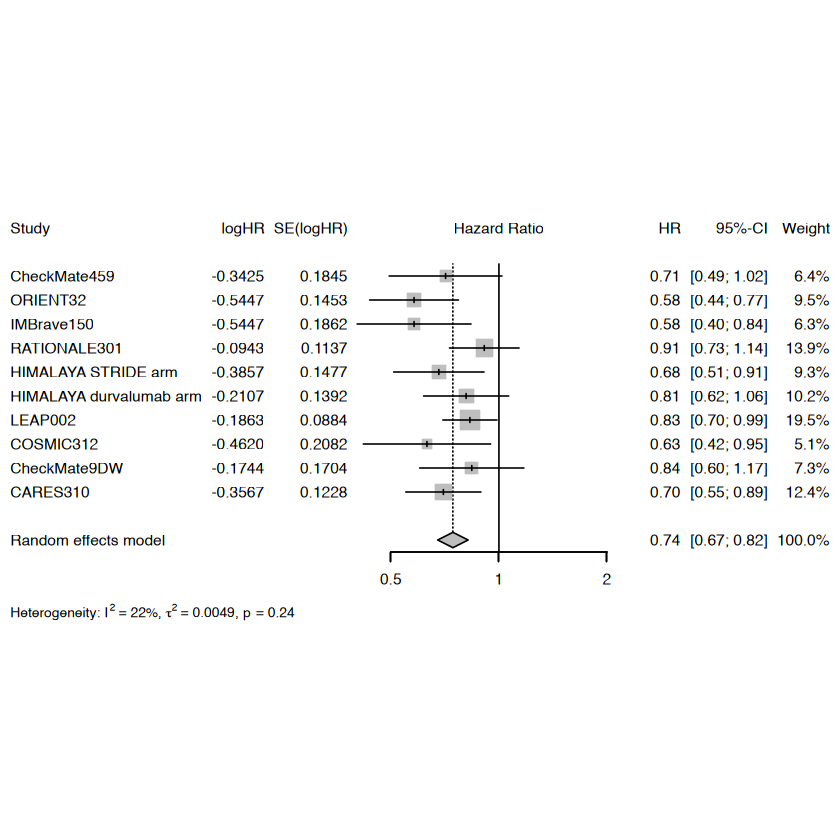

In [4]:
ma_model_HBV = metagen(log_hr, SE, data = df |> filter(Category=='HBV'), studlab=Study, sm="HR")
summary(ma_model_HBV)
forest(ma_model_HBV, fontsize = 9, 
       fixed = FALSE,
       leftlabs = c("Study"))

In [5]:
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/Figure2_etiology.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [7]:
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       xlim = c(.2, 2),
       width = width_,
       file = "../../figures/FigureS14_etiology_fixed_effect.pdf",
       fixed = TRUE,
       random = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [8]:
# publication bias
pdf(file='../../figures/FigureS15_etiology_publication_bias.pdf')
funnel(ma_model_etiology,
       log = "x",
       random = TRUE,
       fixed = F)
dev.off()

pdf 
  2

### 1.2. By other subgroups

In [9]:
for (str_ in c("Age", "AFP", "ECOG", "PD-L1", "Child-Pugh")) {
    df |> filter(grepl(str_, Category)) -> df_sub
    ma_model_etiology = metagen(log_hr,
                                lower = log_hr_lower,
                                upper = log_hr_upper, 
                                SE, data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
    forest(ma_model_etiology, 
           fontsize = 9, 
           spacing = .95,
           xlim = c(.2, 2),
           width = width_,
           file = paste0("../../figures/meta1_", str_, ".pdf"),
           fixed = FALSE,
           print.tau2 = FALSE, 
           colgap.forest.left = ".4cm",
           leftcols = c("studlab"),
           leftlabs = c("Study"))
}

In [10]:
df |> filter(grepl('Age >= 65 years|Age < 65 years', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_Age_sub.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [11]:
df |> filter(grepl('BCLC B|BCLC C', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_BCLC.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [12]:
df |> filter(grepl('Male|Female', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_sexes.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [13]:
df |> filter(grepl('MVI yes|MVI no', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_MVI.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [14]:
df |> filter(Category %in% c('EHS yes', 'EHS no')) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_EHS.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [15]:
df |> filter(grepl('MVI or EHS yes|MVI or EHS no', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_MVIorEHS.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [16]:
df |> filter(grepl('excluding Japan)|Rest of', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_geo.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [17]:
df |> filter(grepl('- Asia|- Non-Asia', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta1_geo_NoHBV.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

## 2. Second study: excluding HIMALAYA stride arm

In [18]:
df |> filter(Category %in% c("HBV", "HCV", "Nonviral"), Study!='HIMALAYA STRIDE arm') -> df_sub
df_sub |> filter(Category=='HBV')

ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/FigureS13_etiology_excl_HIMALAYA_STRIDE_arm.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

Study,Ref,Category,IO arm,MKI arm,HR,95% CI low,95% CI high,log_hr,log_hr_lower,log_hr_upper,SE,Trial,Year
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CheckMate459,Yau et al. Lancet Oncol 2021,HBV,87,86,0.71,0.49,1.01,-0.34249031,-0.7133499,0.009950331,0.18451536,CheckMate459,2021
ORIENT32,Ren et al. Lancet Oncol 2021,HBV,359,179,0.58,0.43,0.76,-0.54472718,-0.8439701,-0.274436846,0.14528909,ORIENT32,2021
IMBrave150,"Cheng, et al J Hepatol 2022",HBV,164,76,0.58,0.40,0.83,-0.54472718,-0.9162907,-0.186329578,0.18621458,IMBrave150,2022
RATIONALE301,Qin et al. JAMA Oncol 2023,HBV,214,213,0.91,0.73,1.14,-0.09431068,-0.3147107,0.131028262,0.11370893,RATIONALE301,2023
HIMALAYA durvalumab arm,Sangro et al. AO 2024,HBV,119,119,0.81,0.62,1.07,-0.21072103,-0.4780358,0.067658648,0.13920777,HIMALAYA durvalumab arm,2024
LEAP002,Finn et al. ASCO GI 2024,HBV,323,331,0.83,0.70,0.99,-0.18632958,-0.3566749,-0.010050336,0.08842464,LEAP002,2024
COSMIC312,Yau et al. Lancet GI 2024,HBV,127,64,0.63,0.42,0.95,-0.46203546,-0.8675006,-0.051293294,0.20821614,COSMIC312,2024
CheckMate9DW,Galle et al. ASCO 2024,HBV,114,115,0.84,0.60,1.17,-0.17435339,-0.5108256,0.157003749,0.17036464,CheckMate9DW,2024
CARES310,Vogel et al. ASCO 2024,HBV,208,197,0.70,0.55,0.89,-0.35667494,-0.5978370,-0.116533816,0.12278142,CARES310,2024


## 3. Third study: only positive results

In [19]:
df |> filter(Study %in% c("IMBrave150", 
                        "HIMALAYA durvalumab arm", 
                        "ORIENT32", 
                        "CARES310", 
                        "CheckMate9DW")) -> df_positive
df_positive |> filter(Category %in% c("HBV", "HCV", "Nonviral")) -> df_sub

ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_etiology.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".9cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [20]:
# publication bias
pdf(file='../../figures/meta3_etiology_publication_bias.pdf')
funnel(ma_model_etiology,
       log = "x",
       random = TRUE,
       fixed = F)
dev.off()

pdf 
  2

In [21]:
for (str_ in c("Age", "AFP", "ECOG", "PD-L1", "Child-Pugh")) { #
    print(str_)
    df_positive |> filter(grepl(str_, Category)) -> df_sub
    ma_model_etiology = metagen(log_hr,
                                lower = log_hr_lower,
                                upper = log_hr_upper, 
                                data = df_sub, 
                                studlab=Trial, subgroup = Category, sm="HR")
    forest(ma_model_etiology, 
           fontsize = 9, 
           spacing = .95,
           width = width_,
           xlim = c(.2, 2),
           file = paste0("../../figures/meta3_", str_, ".pdf"),
           fixed = FALSE,
           print.tau2 = FALSE, 
           colgap.forest.left = ".4cm",
           leftcols = c("studlab"),
           leftlabs = c("Study"))
}

[1] "Age"
[1] "AFP"
[1] "ECOG"
[1] "PD-L1"
[1] "Child-Pugh"


In [22]:
df_positive |> filter(grepl('Age >= 65 years|Age < 65 years', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .95,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_age_sub.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = "1.2cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [23]:
df_positive |> filter(grepl('BCLC B|BCLC C', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_BCLC.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [24]:
df_positive |> filter(grepl('Male|Female', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper, 
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_sexes.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [25]:
df_positive |> filter(grepl('MVI yes|MVI no', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_MVI.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [26]:
df_positive |> filter(Category %in% c('EHS yes', 'EHS no')) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       file = "../../figures/meta3_EHS.pdf",
       xlim = c(.2, 2),
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [27]:
df_positive |> filter(grepl('MVI or EHS yes|MVI or EHS no', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_MVIorEHS.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = "1.5cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [28]:
df_positive |> filter(grepl('excluding Japan)|Rest of', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, 
                            studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       width = width_,
       xlim = c(.2, 2),
       file = "../../figures/meta3_geo.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = "1cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))

In [29]:
df_positive |> filter(grepl('- Asia|- Non-Asia', Category)) -> df_sub
ma_model_etiology = metagen(log_hr, 
                            lower = log_hr_lower,
                            upper = log_hr_upper,
                            data = df_sub, studlab=Trial, subgroup = Category, sm="HR")
# summary(ma_model_etiology)
forest(ma_model_etiology, 
       fontsize = 9, 
       spacing = .82,
       xlim = c(.2, 2),
       width = width_,
       file = "../../figures/meta3_geo_NoHBV.pdf",
       fixed = FALSE,
       print.tau2 = FALSE, 
       colgap.forest.left = ".4cm",
       leftcols = c("studlab"),
       leftlabs = c("Study"))